<h1 align=center><font size = 5>Data Science and Machine Learning Capstone Project</font></h1>

### Question 1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first? ###

***<font size = 3>Data preparation</font>***

First, lets import the necessary libraries and data to answer this.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Import 311 NYC dataset

In [2]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key'] 
df_311= pd.read_csv('fhrw-4uyv.csv', parse_dates = ['created_date'], usecols = columns_used)
df_311.head()

,borough,city,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,street_name,unique_key
0,MANHATTAN,NEW YORK,APPLIANCE,2016-12-05 16:13:38,4530 BROADWAY,10040.0,40.858663,RESIDENTIAL BUILDING,-73.931621,BROADWAY,34931759
1,QUEENS,Richmond Hill,DOOR/WINDOW,2016-12-05 20:43:42,86-41 127 STREET,11418.0,40.702431,RESIDENTIAL BUILDING,-73.824103,127 STREET,34931760
2,BROOKLYN,BROOKLYN,DOOR/WINDOW,2016-12-05 14:59:24,788 NEW LOTS AVENUE,11208.0,40.666954,RESIDENTIAL BUILDING,-73.881327,NEW LOTS AVENUE,34931765
3,MANHATTAN,NEW YORK,DOOR/WINDOW,2016-12-05 16:40:33,153 MANHATTAN AVENUE,10025.0,40.799426,RESIDENTIAL BUILDING,-73.960927,MANHATTAN AVENUE,34931771
4,BROOKLYN,BROOKLYN,SAFETY,2016-12-05 07:57:43,613 EAST 16 STREET,11226.0,40.635246,RESIDENTIAL BUILDING,-73.962338,EAST 16 STREET,34931773


Preliminary checking for columns type in dataframe.

In [3]:
df_311.dtypes

borough                     object
city                        object
complaint_type              object
created_date        datetime64[ns]
incident_address            object
incident_zip               float64
latitude                   float64
location_type               object
longitude                  float64
street_name                 object
unique_key                   int64
dtype: object

All type of features seems all right. Next, let's check the missing values

In [4]:
missing_data_311= df_311.isnull()
missing_data_311.head()

,borough,city,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,street_name,unique_key
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data_311.columns.values.tolist():
    print(column)
    #Menghitung jumlah masing-masing nilai unik pada kolom data
    print (missing_data_311[column].value_counts())
    print("")

borough
False    5619790
Name: borough, dtype: int64

city
False    5535050
True       84740
Name: city, dtype: int64

complaint_type
False    5619790
Name: complaint_type, dtype: int64

created_date
False    5619790
Name: created_date, dtype: int64

incident_address
False    5566873
True       52917
Name: incident_address, dtype: int64

incident_zip
False    5534704
True       85086
Name: incident_zip, dtype: int64

latitude
False    5534730
True       85060
Name: latitude, dtype: int64

location_type
False    5566874
True       52916
Name: location_type, dtype: int64

longitude
False    5534730
True       85060
Name: longitude, dtype: int64

street_name
False    5566873
True       52917
Name: street_name, dtype: int64

unique_key
False    5619790
Name: unique_key, dtype: int64



There is no missing values for **complaint_type** feature, so let's keep all row in this dataframe as it is for now. Next, Let's check the number of each value of **complaint_type** column.

In [6]:
df_311['complaint_type'].value_counts()

HEAT/HOT WATER            1087060
HEATING                    887869
PLUMBING                   679799
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       398383
PAINT - PLASTER            361258
PAINT/PLASTER              317276
ELECTRIC                   292175
NONCONST                   260890
DOOR/WINDOW                183925
WATER LEAK                 171793
GENERAL                    134558
FLOORING/STAIRS            125168
APPLIANCE                  103282
HPD Literature Request      52916
SAFETY                      45188
OUTSIDE BUILDING             6604
ELEVATOR                     5672
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

***<font size = 3>Visualizing and get some insight from data</font>***

Create barh plot to visualize the proportion of the complaints.

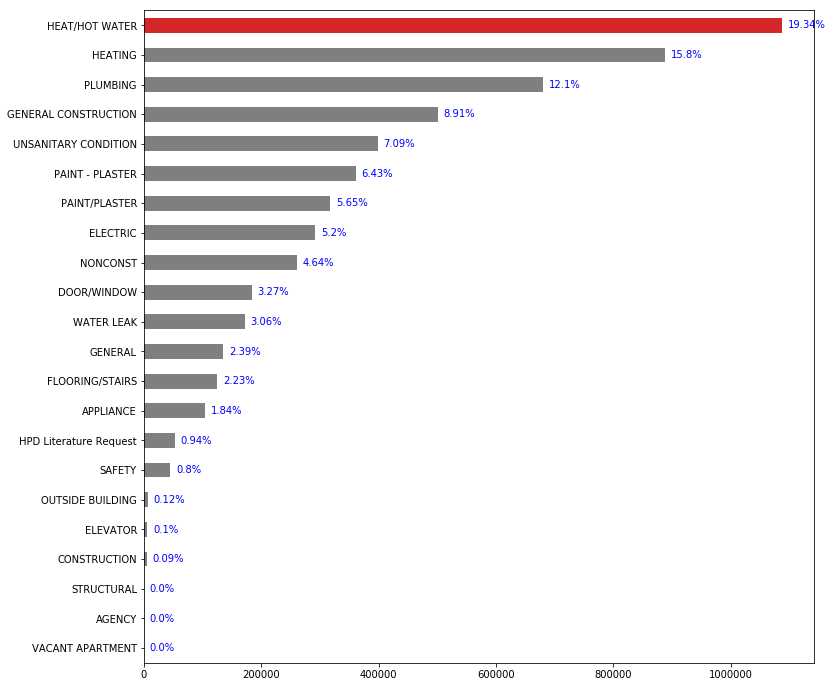

In [8]:
# Set colors
colors = ['C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C3']
#Set the series
df_311_complaint_type = df_311['complaint_type'].value_counts()
df_311_complaint_type.sort_values(ascending = True, inplace =True)
Total_complaint = df_311_complaint_type.sum()

# Create the barh plot
df_311_complaint_type.plot(kind = 'barh', figsize = (12,12), color = colors)

# Set text label to show the percentage of each complaint
for index, value in enumerate(df_311_complaint_type):
    label =  '{}%'.format(round((value/Total_complaint)*100, 2)) 
    plt.annotate(label, xy=(value + 10000, index-0.1), color='blue')
    
plt.show()

The top 4 complaints takes more than 50% of total complaints which are HEAT/HOT WATER, HEATING, PLUMBING and GENERAL CONSTRUCTION. But for now, I am in the opinion that the Department of Housing Preservation and Development should focus on HEAT/HOT WATER complaint first.

Note: The data is recorded from from January, 2010 to February, 2019.

***<font size = 3>Author : Hadi Muhshi</font>*** 